# <center>DefineGLORYS12V1Basins JN</center>
This jupyter-notebook is used to show ExoCcycle's 1) use in simplifying (averaging) temporal and vertically resolved themochemical ocean fields from GLORYS12V1 and 2) ability to detect community structure within these fields.


<center>Figure 1: ....</center>
<br>
<br>





# Imports

In [6]:
# Import necessary libraries
import ExoCcycle as EC
import os
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

# Format GLORYS12V1 to be used with the ExoCcycle community detection algorithm

Create six datasets given average 1994 models/data:
1. Average deep (1000-6000m) ocean salinity
2. Average deep (1000-6000m) ocean potential temperature 
3. Average intermediate (100-1000m) ocean salinity
4. Average intermediate (100-1000m) ocean potential temperature 
5. Average shallow (0-100m) ocean salinity
6. Average shallow (0-100m) ocean potential temperature 



In [3]:
# Initialize object (Defaults to using 1994, bottomT data)
dataType = 'so'
options = {"download": False,
           "dataDir":os.getcwd()+"/GLORYS12V1",
           "year":[1994],
           "data": dataType,
           "depthAve": [1000,6000]}

GLORYS12V1 = EC.utils.GLORYS12V1(options)

# Average models all months in 1994
GLORYS12V1.averageModels()


# Initialize object (Defaults to using 1994, bottomT data)
dataType = 'thetao'
options = {"download": False,
           "dataDir":os.getcwd()+"/GLORYS12V1",
           "year":[1994],
           "data": dataType,
           "depthAve": [1000,6000]}

GLORYS12V1 = EC.utils.GLORYS12V1(options)

# Average models all months in 1994
GLORYS12V1.averageModels()


# Initialize object (Defaults to using 1994, bottomT data)
dataType = 'so'
options = {"download": False,
           "dataDir":os.getcwd()+"/GLORYS12V1",
           "year":[1994],
           "data": dataType,
           "depthAve": [100,1000]}

GLORYS12V1 = EC.utils.GLORYS12V1(options)

# Average models all months in 1994
GLORYS12V1.averageModels()


# Initialize object (Defaults to using 1994, bottomT data)
dataType = 'thetao'
options = {"download": False,
           "dataDir":os.getcwd()+"/GLORYS12V1",
           "year":[1994],
           "data": dataType,
           "depthAve": [100,1000]}

GLORYS12V1 = EC.utils.GLORYS12V1(options)

# Average models all months in 1994
GLORYS12V1.averageModels()


# Initialize object (Defaults to using 1994, bottomT data)
dataType = 'so'
options = {"download": False,
           "dataDir":os.getcwd()+"/GLORYS12V1",
           "year":[1994],
           "data": dataType,
           "depthAve": [0,100]}

GLORYS12V1 = EC.utils.GLORYS12V1(options)

# Average models all months in 1994
GLORYS12V1.averageModels()


# Initialize object (Defaults to using 1994, bottomT data)
dataType = 'thetao'
options = {"download": False,
           "dataDir":os.getcwd()+"/GLORYS12V1",
           "year":[1994],
           "data": dataType,
           "depthAve": [0,100]}

GLORYS12V1 = EC.utils.GLORYS12V1(options)

# Average models all months in 1994
GLORYS12V1.averageModels()



# Use Average shallow/intermediate/deep ocean salinity to calculate basin communities

<br>

#### Some notes on the below community detections:

1. Run calculations with node spacing representing equal area quadrangles.

2. Note that the PSU values are shown with a colorbar that represents 1 std that are area weighted.

3. Using propertyInv/distanceV edge weight

4. Using Louvain-Girvan-Newman algorithm

5. Louvain resolution: 1

6. Girvan-Newman minimum unisolated basins: 30

7. Community merger package is EC.utils.mergePackage(package='Lite')



In [1]:
# Import necessary libraries
import ExoCcycle as EC
import os
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset


# Make folder to hold figure results
!mkdir -p figures/GLORYS12V1
fldName = EC.utils.makeFolderSeries(fldBase='figures/GLORYS12V1/GLORYS12V1_1994_PSU')

print("Storing images in {}".format(fldName))

# Short readme text to write to folder with images
readmetxt = "Note that the PSU values are shown with a colorbar that represents 1 std that are area weighted.";
readmetxt += "\nUsing S/distanceV edge weight";
readmetxt += "\nWhere S=( np.exp( (np.abs(dataRange) - np.abs(values1-values2))/(stretch*dataSTD) ) ) / np.exp( (np.abs(dataRange)/(stretch*dataSTD) ) )";
readmetxt += "\nWhere values1-values2 are the property value of the nodes and stretch = 0.2 and when S=0.2";
readmetxt += "\nOtherwise S=(1/np.abs(values1-values2)) * (breakPointWeight*breakPointDiff)";
readmetxt += "\nWhere breakPointWeight and breakPointDiff force a continuous (not smooth) connection between Exp and Inv S relationships.";
readmetxt += "\ndataRange and dataSTD are calculated with dataEdgeDiffIQRFiltered, the difference of node property with outliers removed using the IQR method."
readmetxt += "\nlowerbound = dataSTD*factor and upperbound = dataSTD/factor, where factor=4 and weight changes occur only over lowerbound-upperbound.";
readmetxt += "\nUsing Louvain-Girvan-Newman algorithm";
readmetxt += "\nLouvain resolution: 1";
readmetxt += "\nGirvan-Newman minimum unisolated basins: 30";
readmetxt += "\nCommunity merger package is EC.utils.mergePackage(package='Lite')";

readmetxt += "\n";
readmetxt += "\nTesting: Results should not be used for publication";



with open(fldName+"/readme.txt", "w") as text_file:
    text_file.write(readmetxt)

# Define all depth ranges to calculate community division for
depthRanges = np.array([[0,100],[100,1000],[1000,6000]]);

# Iterate over different depth ranges to evaluate
for i in range(depthRanges.shape[0]):
    # Define ith depth range to evaluate
    depthRange = depthRanges[i,:];

    # Initial basin definition class
    body = ["Earth", "Mars", "Venus", "Moon"]
    body = body[0]
    basins = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                             filename="{}_resampled_1deg.nc".format(body),
                             body=body);

    # Define the equal area node options s.t. salinity is used for edge connections 
    basins.EAinputs['dataGrid'] = os.getcwd()+"/GLORYS12V1/so_average_{0}_{1}m.nc".format(depthRange[0], depthRange[1])
    basins.EAinputs['parameter'] = "z"
    
    
    # Define basins based on user input boundaries.
    # For the Louvain-Girvan-Newman composite algorithm the variable
    # minBasinCnt refers to the number of basins to maintain that are
    # not completely isolated after running the louvain algorithm.
    basins.defineBasins(minBasinCnt = 30,
                        method = "Louvain-Girvan-Newman",
                        reducedRes={"on":True,"factor":1},
                        read=False,
                        write=True,
                        verbose=False)
    

    # Define basin merging criteria
    mergerPackage = EC.utils.mergerPackages('Lite');
    mergerPackage['mergeSmallBasins']['threshold'] = [0.1, 0.5]
    mergerPackage['verbose'] = False;

    # Merge communities based off criteria 
    basins.applyMergeBasinMethods(mergerID=0, mergerPackage=mergerPackage)

    # Convert basinID equal area grid to regular grid
    basins.interp2regularGrid(mask=True)


    # Plot results of community IDs
    EC.utils.plotGlobal(basins.lat, basins.lon, basins.BasinIDA,
                        outputDir = os.getcwd()+"/"+fldName,
                        fidName = "plotGlobal_{0}_{1}m.png".format(depthRange[0], depthRange[1]),
                        cmapOpts={"cmap":"jet",
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[0,np.nanmax(basins.BasinIDA)]},
                        pltOpts={"valueType": "BasinID divided by PSU {0}-{1} m".format(depthRange[0], depthRange[1]),
                                 "valueUnits": "-",
                                 "plotTitle":"",
                                 "plotZeroContour":False,
                                 "plotIntegerContours":True,
                                 "transparent":True},
                        savePNG=True,
                        saveSVG=False)
    

    # Write temp.nc that only has lat/lon/value
    basins.simplifyNetCDF(inputPath=basins.EAinputs['dataGrid'],
                        outputPath='tempSimp.nc',
                        parameter=basins.EAinputs['parameter'])
    # Read netCDF4
    nc = Dataset('tempSimp.nc')
    XX, YY = np.meshgrid(nc['lon'][:].data, nc['lat'][:].data)
    
    # Calculate area weighted average and standard deviation (for plotting)
    areaWeights, longitudes, latitudes, totalArea, totalAreaCalculated = EC.utils.areaWeights(resolution=np.diff(nc['lon'][:].data)[0],
                                                                                              LonStEd = [-180,180],
                                                                                              LatStEd = [-80-np.diff(nc['lon'][:].data)[0],90])
    ave, std = EC.utils.weightedAvgAndStd(nc['z'][:].data, areaWeights)
    
    # Plot PSU at depth interval
    EC.utils.plotGlobal(YY, XX, nc['z'][:].data,
                        outputDir = os.getcwd()+"/"+fldName,
                        fidName = "plotGlobal_{0}_{1}m_PSU.png".format(depthRange[0], depthRange[1]),
                        cmapOpts={"cmap":"jet",
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[ave-1*std,
                                                ave+1*std]},
                        pltOpts={"valueType": "PSU {0}-{1} m".format(depthRange[0], depthRange[1]),
                                 "valueUnits": "1e3",
                                 "plotTitle":"",
                                 "plotZeroContour":False,
                                 "transparent":True},
                        savePNG=True,
                        saveSVG=False)
    nc.close()


/home/bogumil/anaconda3/envs/ExoCcycle/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Storing images in figures/GLORYS12V1/GLORYS12V1_1994_PSU_17


/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:7132: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))


Duplicates removed: 1306
Grid saved to: EA_Nodes_1.0_xyz.txt


sh: 1: temp.txt: not found
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24745/24745 [00:05<00:00, 4614.96it/s]


KeyboardInterrupt: 

Strength in node connection changes over 80% data with greater variation than the 20% with the lowest variation


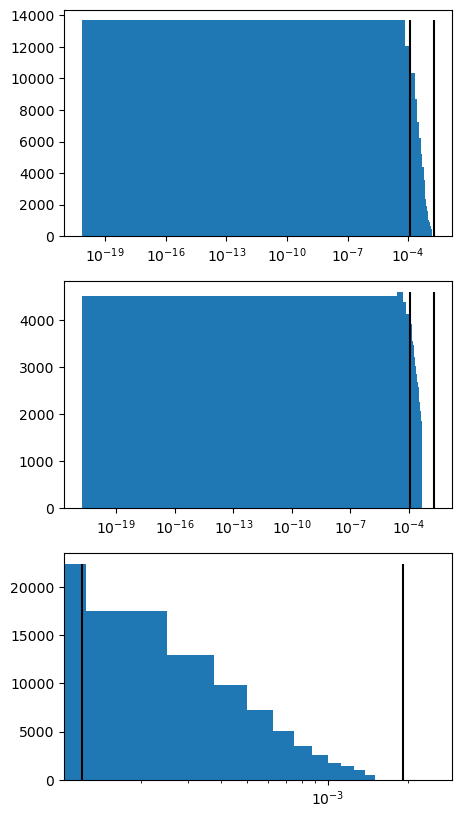

In [65]:
from scipy.stats import norm


# Mirror dataEdgeDiff about zero when finding the std.
# This is appropriate since each edge is didirectional.
# As a result, the mean should be zero.
std = np.std( np.append(basins.dataEdgeDiff, -basins.dataEdgeDiff) );

# Find median property difference
median = np.median( basins.dataEdgeDiff );

# Find mean property difference
mean = np.mean( basins.dataEdgeDiff );

# Remove outliers from basins.dataEdgeDiff and calculate std
def remove_outliers_iqr(data):
    """Removes outliers from a NumPy array using the IQR method.

    Args:
        data (np.ndarray): The input NumPy array.

    Returns:
        np.ndarray: A new NumPy array with outliers removed.
    """
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    return filtered_data

def percentage_within_std(x):
    """
    Returns the percentage of data within ±x standard deviations
    for a standard normal distribution (mean=0, std=1).
    
    Parameters:
        x (float): Number of standard deviations.
        
    Returns:
        float: Percentage of data within ±xσ (0 to 100).
    """
    prob = norm.cdf(x) - norm.cdf(-x)
    return prob * 100


# Get outliers filtered dataEdgeDiff using the IQR method.
dataEdgeDiffIQRFiltered = remove_outliers_iqr(basins.dataEdgeDiff);

# Mirror dataEdgeDiff about zero when finding the std.
# This is appropriate since each edge is didirectional.
# As a result, the mean should be zero.
std = np.std( np.append(dataEdgeDiffIQRFiltered, -dataEdgeDiffIQRFiltered) );

# Find median property difference using the IQR results.
medianIQRFiltered = np.median( dataEdgeDiffIQRFiltered );

# Find mean property difference using the IQR results.
meanIQRFiltered = np.mean( dataEdgeDiffIQRFiltered );

# Set lower bound for difference value to influence connectivity
factor = 4;
lowerbound = std*factor
upperbound = std/factor

print("Strength in node connection changes over {:.0f}% data with greater variation than the {:.0f}% with the lowest variation".format(
    percentage_within_std(factor)-percentage_within_std(1/factor),
    percentage_within_std(1/factor))
     )


# Plot data
#plotData = basins.dataEdgeDiff
plotData = dataEdgeDiffIQRFiltered 

# Figure
fig, axes = plt.subplots(3,1, figsize=(5,10));
binCnt = 20;

plt.sca(axes[0])
handleHist0 = plt.hist(plotData, density=False,
                       bins = np.linspace(0,np.max(plotData),binCnt+1));
handleVlines0 = plt.vlines([lowerbound, upperbound], ymin=0, ymax=np.max(handleHist0[0]), colors='k');
plt.xscale('log')

plt.sca(axes[1])
handleHist1 = plt.hist(plotData, density=False,
                       bins = np.linspace(0,std,binCnt+1));
handleVlines1 = plt.vlines([lowerbound, upperbound], ymin=0, ymax=np.max(handleHist1[0]), colors='k');
plt.xscale('log')

plt.sca(axes[2])
handleHist1 = plt.hist(plotData, density=False,
                       bins = np.linspace(0,0.0025,binCnt+1));
#                       bins = np.linspace(0,std/10,binCnt+1));
handleVlines1 = plt.vlines([lowerbound, upperbound], ymin=0, ymax=np.max(handleHist1[0]), colors='k');
plt.xscale('log')


# Use Average shallow/intermediate/deep ocean salinity to calculate basin communities

<br>

#### Some notes on the below community detections:

1. Run calculations with node spacing representing equal area quadrangles.

2. Note that the PSU values are shown with a colorbar that represents 1 std that are area weighted.

3. Using propertyInv/distanceV edge weight

4. Using Louvain algorithm

5. Louvain resolution: 1

6. Community merger package is EC.utils.mergePackage(package='Lite')


Storing images in figures/GLORYS12V1/GLORYS12V1_1994_PSU_7


/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:7012: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))


Duplicates removed: 1306
Grid saved to: EA_Nodes_1.0_xyz.txt


sh: 1: temp.txt: not found
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24745/24745 [00:05<00:00, 4707.35it/s]


Network has been overwritten.
Network has been overwritten.


/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:7012: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))


Duplicates removed: 1306
Grid saved to: EA_Nodes_1.0_xyz.txt


sh: 1: temp.txt: not found
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23294/23294 [00:04<00:00, 5063.89it/s]


Network has been overwritten.
Network has been overwritten.


/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:7012: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))


Duplicates removed: 1306
Grid saved to: EA_Nodes_1.0_xyz.txt


sh: 1: temp.txt: not found
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21781/21781 [00:04<00:00, 5432.91it/s]


Network has been overwritten.
Network has been overwritten.


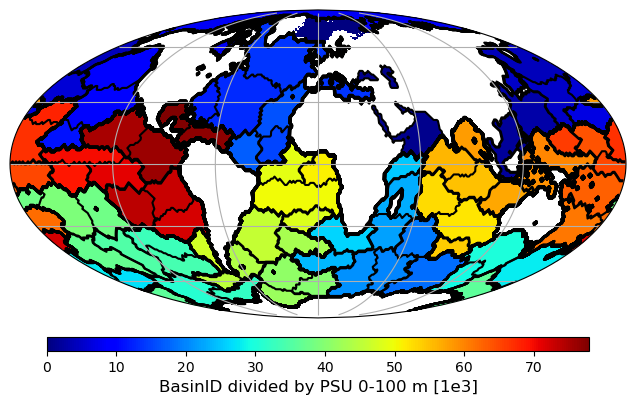

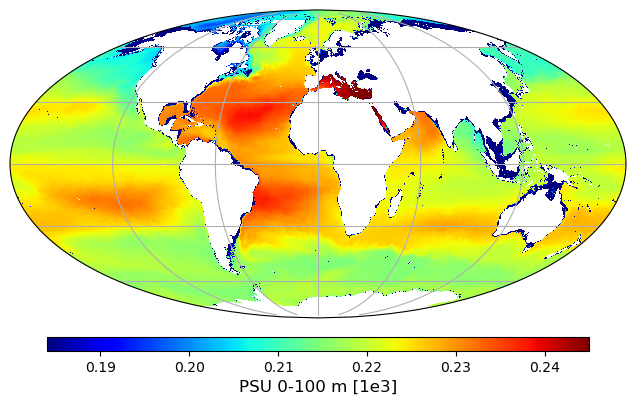

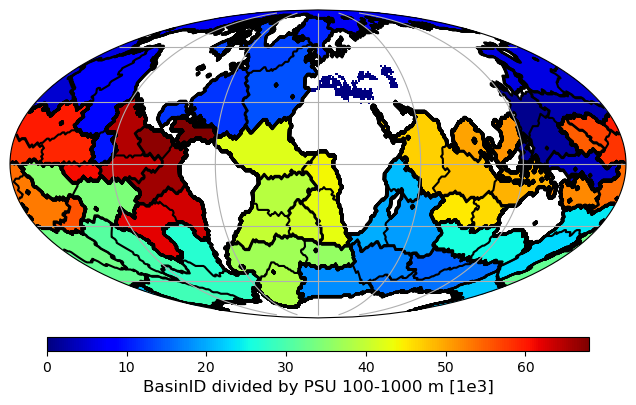

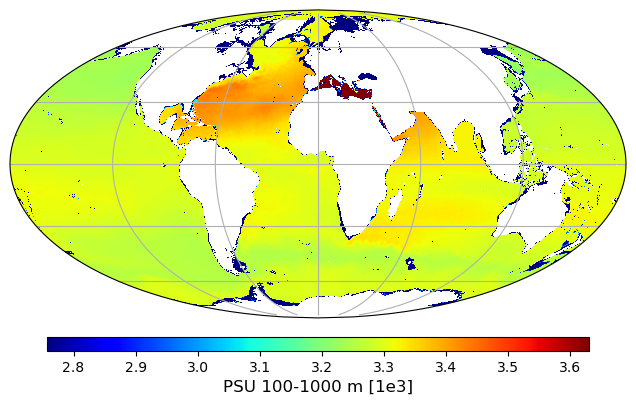

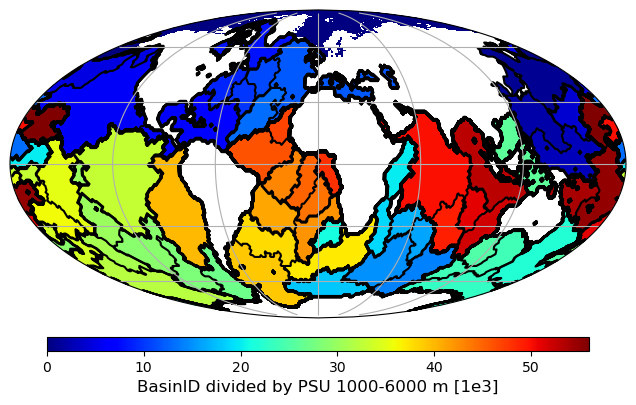

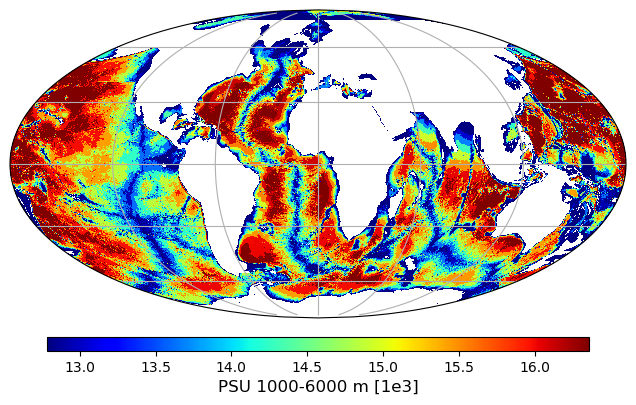

In [2]:
# Import necessary libraries
import ExoCcycle as EC
import os
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset


# Make folder to hold figure results
!mkdir -p figures/GLORYS12V1
fldName = EC.utils.makeFolderSeries(fldBase='figures/GLORYS12V1/GLORYS12V1_1994_PSU')

print("Storing images in {}".format(fldName))

# Short readme text to write to folder with images
readmetxt = "Note that the PSU values are shown with a colorbar that represents 1 std that are area weighted.";
readmetxt += "\nUsing propertyInv/distanceV edge weight";
readmetxt += "\nUsing Louvain algorithm";
readmetxt += "\nLouvain resolution: 1";
readmetxt += "\nCommunity merger package is EC.utils.mergePackage(package='Lite')";


with open(fldName+"/readme.txt", "w") as text_file:
    text_file.write(readmetxt)

# Define all depth ranges to calculate community division for
depthRanges = np.array([[0,100],[100,1000],[1000,6000]]);

# Iterate over different depth ranges to evaluate
for i in range(depthRanges.shape[0]):
    # Define ith depth range to evaluate
    depthRange = depthRanges[i,:];

    # Initial basin definition class
    body = ["Earth", "Mars", "Venus", "Moon"]
    body = body[0]
    basins = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                             filename="{}_resampled_1deg.nc".format(body),
                             body=body);

    # Define the equal area node options s.t. salinity is used for edge connections 
    basins.EAinputs['dataGrid'] = os.getcwd()+"/GLORYS12V1/so_average_{0}_{1}m.nc".format(depthRange[0], depthRange[1])
    basins.EAinputs['parameter'] = "z"
    
    
    # Define basins based on user input boundaries.
    # For the Louvain-Girvan-Newman composite algorithm the variable
    # minBasinCnt refers to the number of basins to maintain that are
    # not completely isolated after running the louvain algorithm.
    basins.defineBasins(minBasinCnt = 30,
                        method = "Louvain",
                        reducedRes={"on":True,"factor":1},
                        read=False,
                        write=True,
                        verbose=False)
    

    # Define basin merging criteria
    mergerPackage = EC.utils.mergerPackages('Lite');
    mergerPackage['mergeSmallBasins']['threshold'] = [0.1, 0.5]
    mergerPackage['verbose'] = False;

    # Merge communities based off criteria 
    basins.applyMergeBasinMethods(mergerID=0, mergerPackage=mergerPackage)

    # Convert basinID equal area grid to regular grid
    basins.interp2regularGrid(mask=True)


    # Plot results of community IDs
    EC.utils.plotGlobal(basins.lat, basins.lon, basins.BasinIDA,
                        outputDir = os.getcwd()+"/"+fldName,
                        fidName = "plotGlobal_{0}_{1}m.png".format(depthRange[0], depthRange[1]),
                        cmapOpts={"cmap":"jet",
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[0,np.nanmax(basins.BasinIDA)]},
                        pltOpts={"valueType": "BasinID divided by PSU {0}-{1} m".format(depthRange[0], depthRange[1]),
                                 "valueUnits": "1e3",
                                 "plotTitle":"",
                                 "plotZeroContour":False,
                                 "plotIntegerContours":True,
                                 "transparent":True},
                        savePNG=True,
                        saveSVG=False)
    

    # Write temp.nc that only has lat/lon/value
    basins.simplifyNetCDF(inputPath=basins.EAinputs['dataGrid'],
                        outputPath='tempSimp.nc',
                        parameter=basins.EAinputs['parameter'])
    # Read netCDF4
    nc = Dataset('tempSimp.nc')
    XX, YY = np.meshgrid(nc['lon'][:].data, nc['lat'][:].data)
    
    # Calculate area weighted average and standard deviation (for plotting)
    areaWeights, longitudes, latitudes, totalArea, totalAreaCalculated = EC.utils.areaWeights(resolution=np.diff(nc['lon'][:].data)[0],
                                                                                              LonStEd = [-180,180],
                                                                                              LatStEd = [-80-np.diff(nc['lon'][:].data)[0],90])
    ave, std = EC.utils.weightedAvgAndStd(nc['z'][:].data, areaWeights)
    
    # Plot PSU at depth interval
    EC.utils.plotGlobal(YY, XX, nc['z'][:].data,
                        outputDir = os.getcwd()+"/"+fldName,
                        fidName = "plotGlobal_{0}_{1}m_PSU.png".format(depthRange[0], depthRange[1]),
                        cmapOpts={"cmap":"jet",
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[ave-1*std,
                                                ave+1*std]},
                        pltOpts={"valueType": "PSU {0}-{1} m".format(depthRange[0], depthRange[1]),
                                 "valueUnits": "1e3",
                                 "plotTitle":"",
                                 "plotZeroContour":False,
                                 "transparent":True},
                        savePNG=True,
                        saveSVG=False)
    nc.close()



In [ ]:
# After running the 

# Imports
from collections import defaultdict
import itertools
import networkx as nx

# Name of community detection method
method='Louvain-Girvan-Newman';

# Minimum number of connected louvain communities to retain
# when running girvan-newman community detection.
minBasinCnt = 30;

# Run composite communitity detection
if method=="Louvain-Girvan-Newman":


    # Perform a louvain community detection
    ## Run Louvain community detection
    Lcommunities = nx.community.louvain_communities(basins.G,
                                                   weight='bathyAve',
                                                   resolution=1,
                                                   threshold=1e-12,
                                                   seed=1)

    ## Mapping from node to community index from Louvain community detection
    node_to_comm = {}
    for idx, comm in enumerate(Lcommunities):
        for node in comm:
            node_to_comm[node] = idx

    # Construct new graph with Louvain community consolidated nodes
    basins.Gnew = nx.Graph()

    # Add *all* communities as nodes, even if disconnected
    basins.Gnew.add_nodes_from(range(len(Lcommunities)))  # One node per community index
    
    # Track summed weights between communities
    edge_weights = defaultdict(float)
    
    # Track unisolated louvain communities (communities that connect to other communities).
    unisolatedCommunities = np.array([])

    # Iterate over all edges in the original graph
    for u, v, data in basins.G.edges(data=True):
        cu = node_to_comm[u]
        cv = node_to_comm[v]
        weight = data.get('bathyAve', 1.0)

        if cu != cv:
            # Undirected: sort community pair to avoid duplicates
            edge = tuple(sorted((cu, cv)))
            edge_weights[edge] += weight
            # Tracks louvain community ids that connect to other communities
            if (unisolatedCommunities != cu).all() | (len(unisolatedCommunities)==0):
                unisolatedCommunities = np.append(unisolatedCommunities, cu)

        else:
            # Represents connections within community
            pass

    # Communities that share no edge with other community
    # Used for determining the number of unisolated communities
    # when using the girvan-newman algorithm.
    isolatedCommunitiesCnt = len(Lcommunities)-len(unisolatedCommunities);

    # Add weighted edges to Gnew
    for (cu, cv), weight in edge_weights.items():
        basins.Gnew.add_edge(cu, cv, bathyAve=weight)

    # Apply Girvan–Newman algorithm to the simplified community graph
    communitityCnt = isolatedCommunitiesCnt + minBasinCnt
    comp = nx.community.girvan_newman(basins.Gnew)
    limited = itertools.takewhile(lambda c: len(c) <= communitityCnt, comp)
    for communities in limited:
        GNcommunities = communities
    #GNcommunities = next(nx.community.girvan_newman(basins.Gnew))
    
    # Assign communities output after mapping index to original nodes
    communities = {i: sorted(list(comm)) for i, comm in enumerate(GNcommunities)}
    
    # Map each original Louvain coummunit to a Girvan–Newman community
    louvain_to_gn = {}
    for idx, comm in enumerate(GNcommunities):
        for c in comm:
            louvain_to_gn[c] = idx
            
    # Map each original node to a Girvan–Newman community via its Louvain community
    commNodes = [{} for _ in range(len(Lcommunities))]
    for commL in louvain_to_gn:
        commGN = louvain_to_gn[commL];

        try:
            # Do not comment out. If this code can run then commNodes[commGN]
            # has already been defined
            len(commNodes[commGN]);
            commNodes[commGN].update(Lcommunities[commL])
        except:
            commNodes[commGN] = Lcommunities[commL]

    # Redefine the node community structure
    basins.communitiesFinal = commNodes;
            

# Show communities over bathymetry map (Can remove code block)

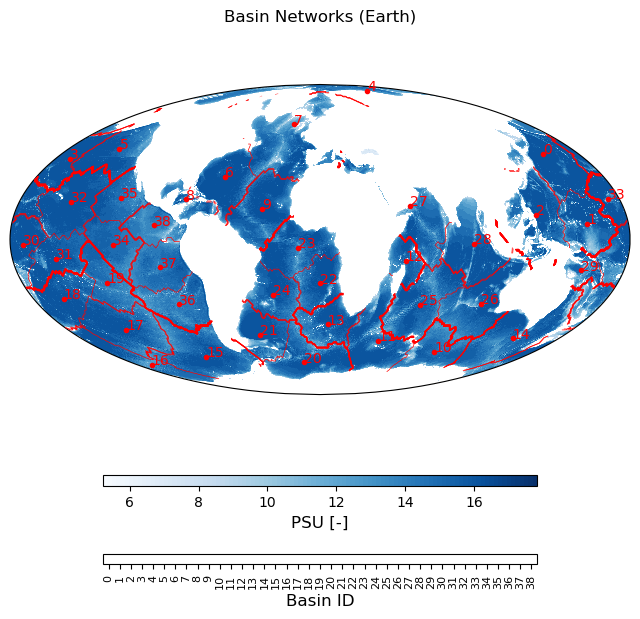

In [8]:
# Import necessary libraries
import ExoCcycle as EC
import os
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

# Initial basin definition class
body = ["Earth", "Mars", "Venus", "Moon"]
body = body[0]
basins = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                         filename="{}_resampled_1deg.nc".format(body),
                         body=body);

# Define the equal area node options s.t. salinity is used for edge connections 
basins.EAinputs['dataGrid'] = os.getcwd()+"/GLORYS12V1/so_average_1000_5000m.nc"
basins.EAinputs['parameter'] = "z"

# Define basins based on user input boundaries
basins.defineBasins(minBasinCnt = 3,
                    method = "Louvain",
                    reducedRes={"on":True,"factor":1},
                    read=False,
                    write=True,
                    verbose=False)


#basins.interp2regularGrid(mask=True)
package = EC.utils.mergerPackages(package='Lite')
package['verbose']= False
basins.applyMergeBasinMethods(mergerID=0,
                              mergerPackage=package)

basins.interp2regularGrid(mask=True)


EC.utils.plotGlobal(basins.lat, basins.lon, basins.BasinIDA,
                    outputDir = os.getcwd(),
                    fidName = "plotGlobal.png",
                    cmapOpts={"cmap":"jet",
                              "cbar-title":"cbar-title",
                              "cbar-range":[0,np.nanmax(basins.BasinIDA)]},
                    pltOpts={"valueType": "BasinID divided by PSU >1000m",
                             "valueUnits": "-",
                             "plotTitle":"",
                             "plotZeroContour":False},
                    savePNG=False,
                    saveSVG=False)


basins.reducedRes = 1
blues_cm = mpl.colormaps['Blues'].resampled(100)
basins.visualizeCommunities( cmapOpts={"cmap":blues_cm,
                                       "cbar-title":"cbar-title",
                                       "cbar-range":[np.nanmin(np.nanmin(basins.bathymetry)),
                                                     np.nanmean(basins.bathymetry)+2*np.nanstd(basins.bathymetry)]},
                             pltOpts={"valueType": {"path":"tempSimp.nc", "attribute":'z', 'name':"PSU"},
                                      "valueUnits": "-",
                                      "plotTitle":"{}".format(basins.body),
                                      "plotZeroContour":True,
                                      "nodesize":1,
                                      "connectorlinewidth":1,
                                      "projection":"Mollweide"},
                             draw={"nodes":False,
                                   "connectors":False,
                                   "plotValue":True,
                                   "coastlines":False,
                                   "gridlines":False,
                                   "nodes-contour":True},
                             saveSVG=False,
                             savePNG=True)



/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:6503: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
sh: 1: temp.txt: not found


Duplicates removed: 1306
Grid saved to: EA_Nodes_1.0_xyz.txt


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24441/24441 [00:04<00:00, 4954.67it/s]


Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.


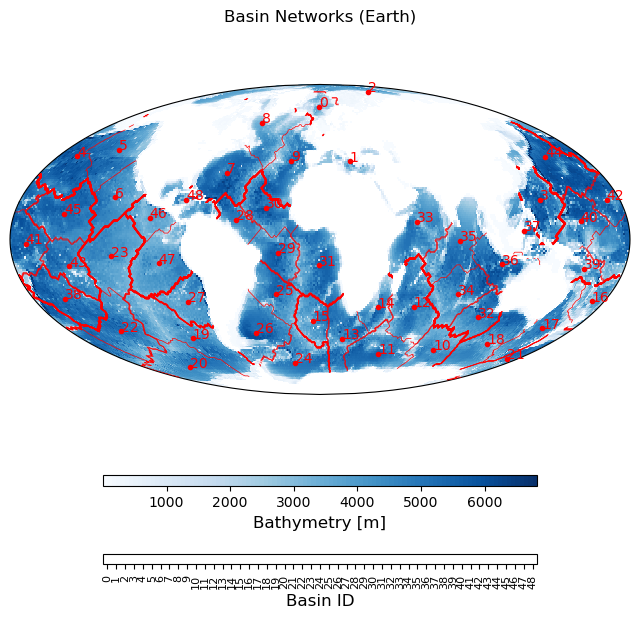

In [3]:
# Import necessary libraries
import ExoCcycle as EC
import os
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

# Initial basin definition class
body = ["Earth", "Mars", "Venus", "Moon"]
body = body[0]
basins = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                         filename="{}_resampled_1deg.nc".format(body),
                         body=body);


# Define basins based on user input boundaries
basins.defineBasins(minBasinCnt = 3,
                    method = "Louvain",
                    reducedRes={"on":True,"factor":1},
                    read=False,
                    write=True,
                    verbose=False)


#basins.interp2regularGrid(mask=True)
package = EC.utils.mergerPackages(package='Lite')
package['verbose']= False
basins.applyMergeBasinMethods(mergerID=0,
                              mergerPackage=package)

basins.interp2regularGrid(mask=True)


#basins.reducedRes = 1
blues_cm = mpl.colormaps['Blues'].resampled(100)
basins.visualizeCommunities( cmapOpts={"cmap":blues_cm,
                                       "cbar-title":"cbar-title",
                                       "cbar-range":[np.nanmin(np.nanmin(basins.bathymetry)),
                                                     np.nanmean(basins.bathymetry)+2*np.nanstd(basins.bathymetry)]},
                             pltOpts={"valueType": "Bathymetry",
                                      "valueUnits": "m",
                                      "plotTitle":"{}".format(basins.body),
                                      "plotZeroContour":True,
                                      "nodesize":1,
                                      "connectorlinewidth":1,
                                      "projection":"Mollweide"},
                             draw={"nodes":False,
                                   "connectors":False,
                                   "plotValue":True,
                                   "coastlines":False,
                                   "gridlines":False,
                                   "nodes-contour":True},
                             saveSVG=False,
                             savePNG=True)


# Use Average shallow/intermediate/deep ocean potential temperature to calculate basin communities
<br>

#### Some notes on the below community detections:

1. Run calculations with node spacing representing equal area quadrangles.

2. Note that the PSU values are shown with a colorbar that represents 1 std that are area weighted.

3. Using propertyInv/distanceV edge weight

4. Using Louvain-Girvan-Newman algorithm

5. Louvain resolution: 1

6. Girvan-Newman minimum unisolated basins: 30

7. Community merger package is EC.utils.mergePackage(package='Lite')

Storing images in figures/GLORYS12V1/GLORYS12V1_1994_PotTemp_5


/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:7052: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))


Duplicates removed: 1306
Grid saved to: EA_Nodes_1.0_xyz.txt


sh: 1: temp.txt: not found
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24746/24746 [00:05<00:00, 4630.60it/s]


Network has been overwritten.
Network has been overwritten.


/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:7052: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))


Duplicates removed: 1306
Grid saved to: EA_Nodes_1.0_xyz.txt


sh: 1: temp.txt: not found
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23294/23294 [00:04<00:00, 5295.95it/s]


Network has been overwritten.
Network has been overwritten.


/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:7052: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))


Duplicates removed: 1306
Grid saved to: EA_Nodes_1.0_xyz.txt


sh: 1: temp.txt: not found
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21781/21781 [00:04<00:00, 5443.74it/s]


Network has been overwritten.
Network has been overwritten.


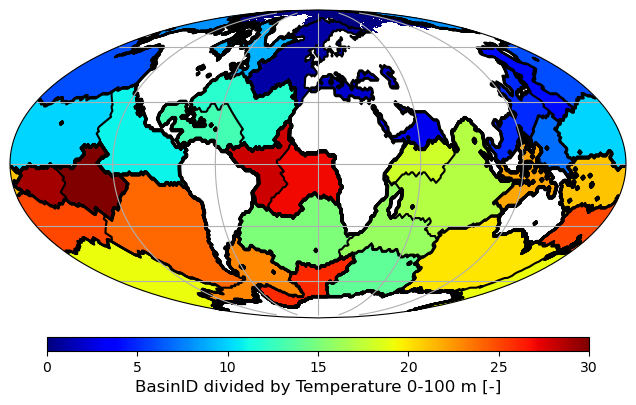

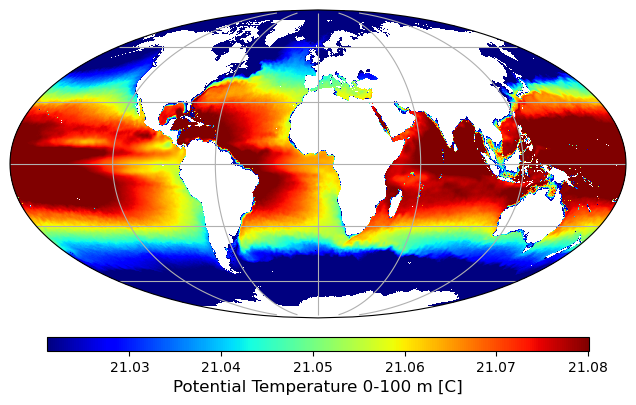

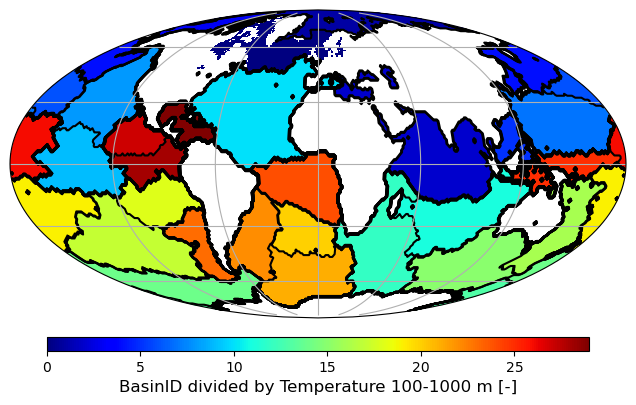

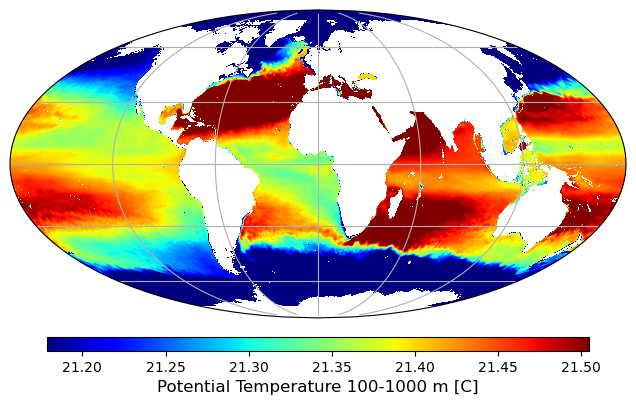

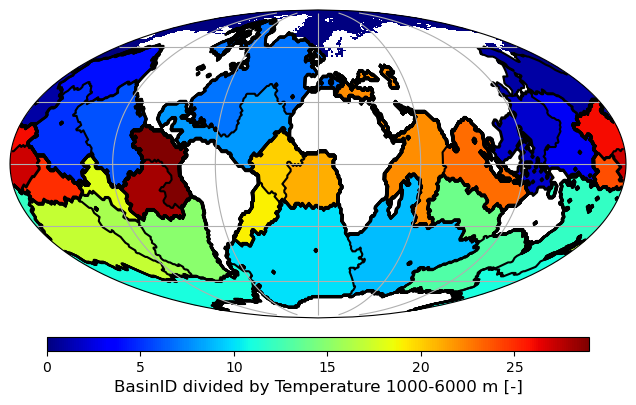

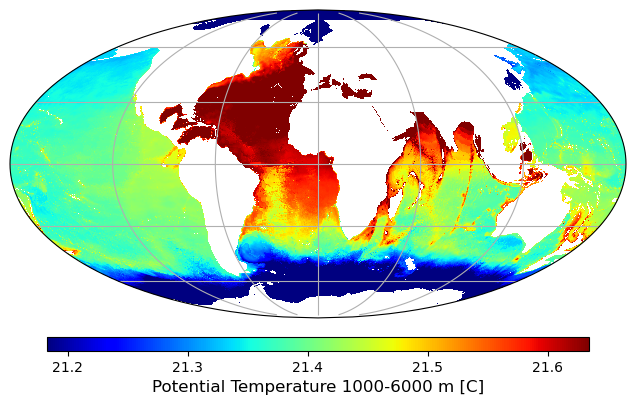

In [2]:
# Import necessary libraries
import ExoCcycle as EC
import os
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset


# Make folder to hold figure results
!mkdir -p figures/GLORYS12V1
fldName = EC.utils.makeFolderSeries(fldBase='figures/GLORYS12V1/GLORYS12V1_1994_PotTemp')

print("Storing images in {}".format(fldName))

# Short readme text to write to folder with images
readmetxt = "Note that the potential temperature values are shown with a colorbar that represents 1 std that are area weighted.";
readmetxt += "\nUsing propertyInv/distanceV edge weight";
readmetxt += "\nUsing Louvain-Girvan-Newman algorithm";
readmetxt += "\nLouvain resolution: 1";
readmetxt += "\nGirvan-Newman minimum unisolated basins: 30";
readmetxt += "\nCommunity merger package is EC.utils.mergePackage(package='Lite')";


with open(fldName+"/readme.txt", "w") as text_file:
    text_file.write(readmetxt)


# Define all depth ranges to calculate community division for
depthRanges = np.array([[0,100],[100,1000],[1000,6000]]);

# Iterate over different depth ranges to evaluate
for i in range(depthRanges.shape[0]):
    # Define ith depth range to evaluate
    depthRange = depthRanges[i,:];

    # Initial basin definition class
    body = ["Earth", "Mars", "Venus", "Moon"]
    body = body[0]
    basins = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                             filename="{}_resampled_1deg.nc".format(body),
                             body=body);

    # Define the equal area node options s.t. salinity is used for edge connections 
    basins.EAinputs['dataGrid'] = os.getcwd()+"/GLORYS12V1/thetao_average_{0}_{1}m.nc".format(depthRange[0], depthRange[1])
    basins.EAinputs['parameter'] = "z"
    
    
    # Define basins based on user input boundaries
    basins.defineBasins(minBasinCnt = 30,
                        method = "Louvain-Girvan-Newman",
                        reducedRes={"on":True,"factor":1},
                        read=False,
                        write=True,
                        verbose=False)
    

    # Define basin merging criteria
    mergerPackage = EC.utils.mergerPackages('Lite');
    mergerPackage['mergeSmallBasins']['threshold'] = [0.1, 0.5]
    mergerPackage['verbose'] = False;

    # Merge communities based off criteria 
    basins.applyMergeBasinMethods(mergerID=0, mergerPackage=mergerPackage)

    # Convert basinID equal area grid to regular grid
    basins.interp2regularGrid(mask=True)


    # Plot results of community IDs
    EC.utils.plotGlobal(basins.lat, basins.lon, basins.BasinIDA,
                        outputDir = os.getcwd()+"/"+fldName,
                        fidName = "plotGlobal_{0}_{1}m.png".format(depthRange[0], depthRange[1]),
                        cmapOpts={"cmap":"jet",
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[0,np.nanmax(basins.BasinIDA)]},
                        pltOpts={"valueType": "BasinID divided by Temperature {0}-{1} m".format(depthRange[0], depthRange[1]),
                                 "valueUnits": "-",
                                 "plotTitle":"",
                                 "plotZeroContour":False,
                                 "plotIntegerContours":True,
                                 "transparent":True},
                        savePNG=True,
                        saveSVG=False)
    

    # Write temp.nc that only has lat/lon/value
    basins.simplifyNetCDF(inputPath=basins.EAinputs['dataGrid'],
                        outputPath='tempSimp.nc',
                        parameter=basins.EAinputs['parameter'])
    # Read netCDF4
    nc = Dataset('tempSimp.nc')
    XX, YY = np.meshgrid(nc['lon'][:].data, nc['lat'][:].data)
    
    # Calculate area weighted average and standard deviation (for plotting)
    areaWeights, longitudes, latitudes, totalArea, totalAreaCalculated = EC.utils.areaWeights(resolution=np.diff(nc['lon'][:].data)[0],
                                                                                              LonStEd = [-180,180],
                                                                                              LatStEd = [-80-np.diff(nc['lon'][:].data)[0],90])
    ave, std = EC.utils.weightedAvgAndStd(nc['z'][:].data, areaWeights)
    
    # Plot PSU at depth interval
    EC.utils.plotGlobal(YY, XX, nc['z'][:].data,
                        outputDir = os.getcwd()+"/"+fldName,
                        fidName = "plotGlobal_{0}_{1}m_PotTemp.png".format(depthRange[0], depthRange[1]),
                        cmapOpts={"cmap":"jet",
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[ave-1*std,
                                                ave+1*std]},
                        pltOpts={"valueType": "Potential Temperature {0}-{1} m".format(depthRange[0], depthRange[1]),
                                 "valueUnits": "C",
                                 "plotTitle":"",
                                 "plotZeroContour":False,
                                 "transparent":True},
                        savePNG=True,
                        saveSVG=False)
    nc.close()



# Use Average shallow/intermediate/deep ocean potential temperature to calculate basin communities
<br>

#### Some notes on the below community detections:

1. Run calculations with node spacing representing equal area quadrangles.

2. Note that the PSU values are shown with a colorbar that represents 1 std that are area weighted.

3. Using propertyInv/distanceV edge weight

4. Using Louvain algorithm

5. Louvain resolution: 1

6. Community merger package is EC.utils.mergePackage(package='Lite')

In [4]:
# Import necessary libraries
import ExoCcycle as EC
import os
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset


# Make folder to hold figure results
!mkdir -p figures/GLORYS12V1
fldName = EC.utils.makeFolderSeries(fldBase='figures/GLORYS12V1/GLORYS12V1_1994_PotTemp')

print("Storing images in {}".format(fldName))

# Short readme text to write to folder with images
readmetxt = "Note that the potential temperature values are shown with a colorbar that represents 1 std that are area weighted.";
readmetxt += "\nUsing propertyInv/distanceV edge weight";
readmetxt += "\nUsing Louvain algorithm";
readmetxt += "\nLouvain resolution: 1";
readmetxt += "\nCommunity merger package is EC.utils.mergePackage(package='Lite')";


with open(fldName+"/readme.txt", "w") as text_file:
    text_file.write(readmetxt)


# Define all depth ranges to calculate community division for
depthRanges = np.array([[0,100],[100,1000],[1000,6000]]);

# Iterate over different depth ranges to evaluate
for i in range(depthRanges.shape[0]):
    # Define ith depth range to evaluate
    depthRange = depthRanges[i,:];

    # Initial basin definition class
    body = ["Earth", "Mars", "Venus", "Moon"]
    body = body[0]
    basins = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                             filename="{}_resampled_1deg.nc".format(body),
                             body=body);

    # Define the equal area node options s.t. salinity is used for edge connections 
    basins.EAinputs['dataGrid'] = os.getcwd()+"/GLORYS12V1/thetao_average_{0}_{1}m.nc".format(depthRange[0], depthRange[1])
    basins.EAinputs['parameter'] = "z"
    
    
    # Define basins based on user input boundaries
    basins.defineBasins(minBasinCnt = 30,
                        method = "Louvain",
                        reducedRes={"on":True,"factor":1},
                        read=False,
                        write=True,
                        verbose=False)
    

    # Define basin merging criteria
    mergerPackage = EC.utils.mergerPackages('Lite');
    mergerPackage['mergeSmallBasins']['threshold'] = [0.1, 0.5]
    mergerPackage['verbose'] = False;

    # Merge communities based off criteria 
    basins.applyMergeBasinMethods(mergerID=0, mergerPackage=mergerPackage)

    # Convert basinID equal area grid to regular grid
    basins.interp2regularGrid(mask=True)


    # Plot results of community IDs
    EC.utils.plotGlobal(basins.lat, basins.lon, basins.BasinIDA,
                        outputDir = os.getcwd()+"/"+fldName,
                        fidName = "plotGlobal_{0}_{1}m.png".format(depthRange[0], depthRange[1]),
                        cmapOpts={"cmap":"jet",
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[0,np.nanmax(basins.BasinIDA)]},
                        pltOpts={"valueType": "BasinID divided by Temperature {0}-{1} m".format(depthRange[0], depthRange[1]),
                                 "valueUnits": "-",
                                 "plotTitle":"",
                                 "plotZeroContour":False,
                                 "plotIntegerContours":True,
                                 "transparent":True},
                        savePNG=True,
                        saveSVG=False)
    

    # Write temp.nc that only has lat/lon/value
    basins.simplifyNetCDF(inputPath=basins.EAinputs['dataGrid'],
                        outputPath='tempSimp.nc',
                        parameter=basins.EAinputs['parameter'])
    # Read netCDF4
    nc = Dataset('tempSimp.nc')
    XX, YY = np.meshgrid(nc['lon'][:].data, nc['lat'][:].data)
    
    # Calculate area weighted average and standard deviation (for plotting)
    areaWeights, longitudes, latitudes, totalArea, totalAreaCalculated = EC.utils.areaWeights(resolution=np.diff(nc['lon'][:].data)[0],
                                                                                              LonStEd = [-180,180],
                                                                                              LatStEd = [-80-np.diff(nc['lon'][:].data)[0],90])
    ave, std = EC.utils.weightedAvgAndStd(nc['z'][:].data, areaWeights)
    
    # Plot PSU at depth interval
    EC.utils.plotGlobal(YY, XX, nc['z'][:].data,
                        outputDir = os.getcwd()+"/"+fldName,
                        fidName = "plotGlobal_{0}_{1}m_PotTemp.png".format(depthRange[0], depthRange[1]),
                        cmapOpts={"cmap":"jet",
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[ave-1*std,
                                                ave+1*std]},
                        pltOpts={"valueType": "Potential Temperature {0}-{1} m".format(depthRange[0], depthRange[1]),
                                 "valueUnits": "C",
                                 "plotTitle":"",
                                 "plotZeroContour":False,
                                 "transparent":True},
                        savePNG=True,
                        saveSVG=False)
    nc.close()



Storing images in figures/GLORYS12V1/GLORYS12V1_1994_PotTemp_3


/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:7012: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))


KeyboardInterrupt: 

# Use Average shallow ocean potential temperature and salinity to calculate basin communities
<br>

#### Some notes on the below community detections:

1. Run calculations with node spacing representing equal area quadrangles.

2. Using propertyInv/distanceV edge weight

3. Using Louvain-Girvan-Newman algorithm

4. Louvain resolution: 1

5. Girvan-Newman minimum unisolated basins: 30

6. Community merger package is EC.utils.mergePackage(package='Lite')

7. Final community divisions are by commbining both divisions from Potential temperature and salinity community detections.

/home/bogumil/anaconda3/envs/ExoCcycle/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Storing images in figures/GLORYS12V1/GLORYS12V1_1994_PSU_and_PotTemp_0


/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:7052: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))


Duplicates removed: 1306
Grid saved to: EA_Nodes_1.0_xyz.txt


sh: 1: temp.txt: not found
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24745/24745 [00:05<00:00, 4809.61it/s]


Network has been overwritten.
Network has been overwritten.
Storing images in figures/GLORYS12V1/GLORYS12V1_1994_PSU_and_PotTemp_0


/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:7052: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))


Duplicates removed: 1306
Grid saved to: EA_Nodes_1.0_xyz.txt


sh: 1: temp.txt: not found
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24746/24746 [00:05<00:00, 4880.83it/s]


Network has been overwritten.
Network has been overwritten.


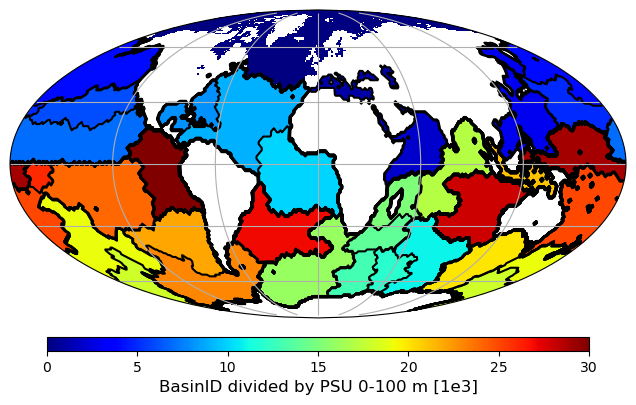

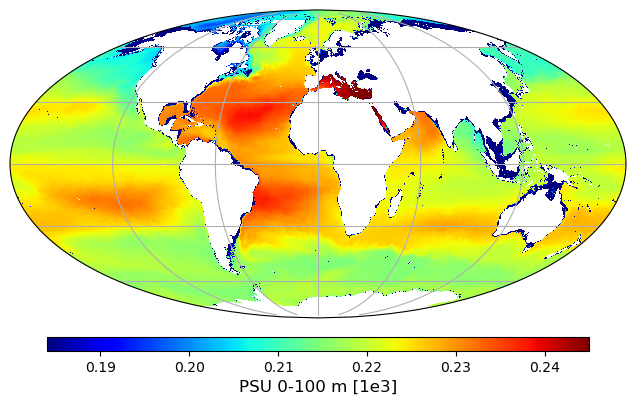

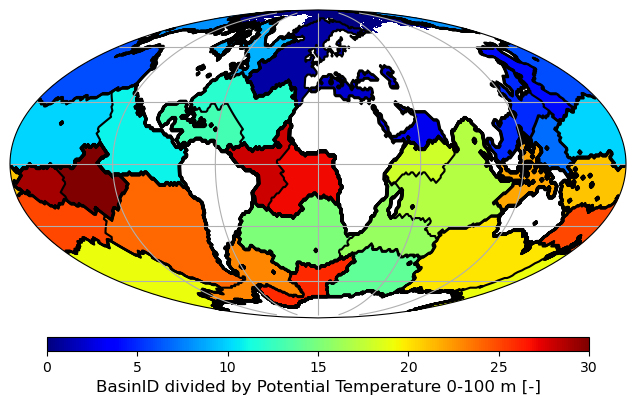

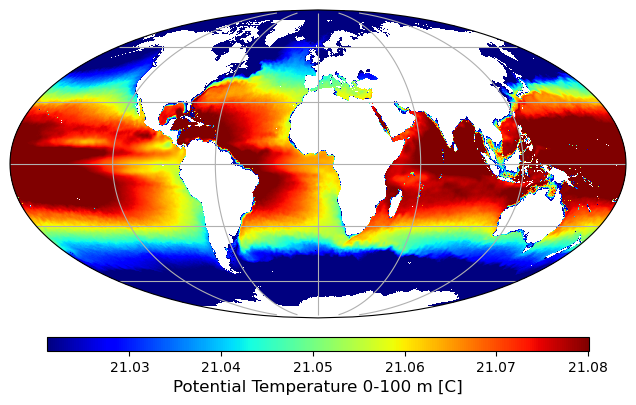

In [1]:
# Import necessary libraries
import ExoCcycle as EC
import os
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset


# Make folder to hold figure results
!mkdir -p figures/GLORYS12V1
fldName = EC.utils.makeFolderSeries(fldBase='figures/GLORYS12V1/GLORYS12V1_1994_PSU_and_PotTemp')


#################################
### PSU community calculation ###
#################################
print("Storing images in {}".format(fldName))

# Short readme text to write to folder with images
readmetxt = "Note that the PSU values are shown with a colorbar that represents 1 std that are area weighted.";
readmetxt += "\nUsing propertyInv/distanceV edge weight";
readmetxt += "\nUsing Louvain-Girvan-Newman algorithm";
readmetxt += "\nLouvain resolution: 1";
readmetxt += "\nGirvan-Newman minimum unisolated basins: 30";
readmetxt += "\nCommunity merger package is EC.utils.mergePackage(package='Lite')";


with open(fldName+"/readme_PSU.txt", "w") as text_file:
    text_file.write(readmetxt)

# Define all depth ranges to calculate community division for
depthRanges = np.array([[0,100]]);

# Iterate over different depth ranges to evaluate
for i in range(depthRanges.shape[0]):
    # Define ith depth range to evaluate
    depthRange = depthRanges[i,:];

    # Initial basin definition class
    body = ["Earth", "Mars", "Venus", "Moon"]
    body = body[0]
    basinsPSU = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                             filename="{}_resampled_1deg.nc".format(body),
                             body=body);

    # Define the equal area node options s.t. salinity is used for edge connections 
    basinsPSU.EAinputs['dataGrid'] = os.getcwd()+"/GLORYS12V1/so_average_{0}_{1}m.nc".format(depthRange[0], depthRange[1])
    basinsPSU.EAinputs['parameter'] = "z"
    
    
    # Define basins based on user input boundaries.
    # For the Louvain-Girvan-Newman composite algorithm the variable
    # minBasinCnt refers to the number of basins to maintain that are
    # not completely isolated after running the louvain algorithm.
    basinsPSU.defineBasins(minBasinCnt = 30,
                           method = "Louvain-Girvan-Newman",
                           reducedRes={"on":True,"factor":1},
                           read=False,
                           write=True,
                           verbose=False)
    

    # Define basin merging criteria
    mergerPackage = EC.utils.mergerPackages('Lite');
    mergerPackage['mergeSmallBasins']['threshold'] = [0.1, 0.5]
    mergerPackage['verbose'] = False;

    # Merge communities based off criteria 
    basinsPSU.applyMergeBasinMethods(mergerID=0, mergerPackage=mergerPackage)

    # Convert basinID equal area grid to regular grid
    basinsPSU.interp2regularGrid(mask=True)


    # Plot results of community IDs
    EC.utils.plotGlobal(basinsPSU.lat, basinsPSU.lon, basinsPSU.BasinIDA,
                        outputDir = os.getcwd()+"/"+fldName,
                        fidName = "plotGlobal_{0}_{1}m.png".format(depthRange[0], depthRange[1]),
                        cmapOpts={"cmap":"jet",
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[0,np.nanmax(basinsPSU.BasinIDA)]},
                        pltOpts={"valueType": "BasinID divided by PSU {0}-{1} m".format(depthRange[0], depthRange[1]),
                                 "valueUnits": "1e3",
                                 "plotTitle":"",
                                 "plotZeroContour":False,
                                 "plotIntegerContours":True,
                                 "transparent":True},
                        savePNG=True,
                        saveSVG=False)
    

    # Write temp.nc that only has lat/lon/value
    basinsPSU.simplifyNetCDF(inputPath=basinsPSU.EAinputs['dataGrid'],
                        outputPath='tempSimp.nc',
                        parameter=basinsPSU.EAinputs['parameter'])
    # Read netCDF4
    nc = Dataset('tempSimp.nc')
    XX, YY = np.meshgrid(nc['lon'][:].data, nc['lat'][:].data)
    
    # Calculate area weighted average and standard deviation (for plotting)
    areaWeights, longitudes, latitudes, totalArea, totalAreaCalculated = EC.utils.areaWeights(resolution=np.diff(nc['lon'][:].data)[0],
                                                                                              LonStEd = [-180,180],
                                                                                              LatStEd = [-80-np.diff(nc['lon'][:].data)[0],90])
    ave, std = EC.utils.weightedAvgAndStd(nc['z'][:].data, areaWeights)
    
    # Plot PSU at depth interval
    EC.utils.plotGlobal(YY, XX, nc['z'][:].data,
                        outputDir = os.getcwd()+"/"+fldName,
                        fidName = "plotGlobal_{0}_{1}m_PSU.png".format(depthRange[0], depthRange[1]),
                        cmapOpts={"cmap":"jet",
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[ave-1*std,
                                                ave+1*std]},
                        pltOpts={"valueType": "PSU {0}-{1} m".format(depthRange[0], depthRange[1]),
                                 "valueUnits": "1e3",
                                 "plotTitle":"",
                                 "plotZeroContour":False,
                                 "transparent":True},
                        savePNG=True,
                        saveSVG=False)
    nc.close()

#############################################
### Potential Temp. community calculation ###
#############################################
print("Storing images in {}".format(fldName))

# Short readme text to write to folder with images
readmetxt = "Note that the PSU values are shown with a colorbar that represents 1 std that are area weighted.";
readmetxt += "\nUsing propertyInv/distanceV edge weight";
readmetxt += "\nUsing Louvain-Girvan-Newman algorithm";
readmetxt += "\nLouvain resolution: 1";
readmetxt += "\nGirvan-Newman minimum unisolated basins: 30";
readmetxt += "\nCommunity merger package is EC.utils.mergePackage(package='Lite')";


with open(fldName+"/readme_PotTemp.txt", "w") as text_file:
    text_file.write(readmetxt)

# Define all depth ranges to calculate community division for
depthRanges = np.array([[0,100]]);

# Iterate over different depth ranges to evaluate
for i in range(depthRanges.shape[0]):
    # Define ith depth range to evaluate
    depthRange = depthRanges[i,:];

    # Initial basin definition class
    body = ["Earth", "Mars", "Venus", "Moon"]
    body = body[0]
    basinsPotTemp = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                             filename="{}_resampled_1deg.nc".format(body),
                             body=body);

    # Define the equal area node options s.t. salinity is used for edge connections 
    basinsPotTemp.EAinputs['dataGrid'] = os.getcwd()+"/GLORYS12V1/thetao_average_{0}_{1}m.nc".format(depthRange[0], depthRange[1])
    basinsPotTemp.EAinputs['parameter'] = "z"
    
    
    # Define basins based on user input boundaries.
    # For the Louvain-Girvan-Newman composite algorithm the variable
    # minBasinCnt refers to the number of basins to maintain that are
    # not completely isolated after running the louvain algorithm.
    basinsPotTemp.defineBasins(minBasinCnt = 30,
                           method = "Louvain-Girvan-Newman",
                           reducedRes={"on":True,"factor":1},
                           read=False,
                           write=True,
                           verbose=False)
    

    # Define basin merging criteria
    mergerPackage = EC.utils.mergerPackages('Lite');
    mergerPackage['mergeSmallBasins']['threshold'] = [0.1, 0.5]
    mergerPackage['verbose'] = False;

    # Merge communities based off criteria 
    basinsPotTemp.applyMergeBasinMethods(mergerID=0, mergerPackage=mergerPackage)

    # Convert basinID equal area grid to regular grid
    basinsPotTemp.interp2regularGrid(mask=True)


    # Plot results of community IDs
    EC.utils.plotGlobal(basinsPotTemp.lat, basinsPotTemp.lon, basinsPotTemp.BasinIDA,
                        outputDir = os.getcwd()+"/"+fldName,
                        fidName = "plotGlobal_{0}_{1}m.png".format(depthRange[0], depthRange[1]),
                        cmapOpts={"cmap":"jet",
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[0,np.nanmax(basinsPotTemp.BasinIDA)]},
                        pltOpts={"valueType": "BasinID divided by Potential Temperature {0}-{1} m".format(depthRange[0], depthRange[1]),
                                 "valueUnits": "-",
                                 "plotTitle":"",
                                 "plotZeroContour":False,
                                 "plotIntegerContours":True,
                                 "transparent":True},
                        savePNG=True,
                        saveSVG=False)
    

    # Write temp.nc that only has lat/lon/value
    basinsPotTemp.simplifyNetCDF(inputPath=basinsPotTemp.EAinputs['dataGrid'],
                        outputPath='tempSimp.nc',
                        parameter=basinsPotTemp.EAinputs['parameter'])
    # Read netCDF4
    nc = Dataset('tempSimp.nc')
    XX, YY = np.meshgrid(nc['lon'][:].data, nc['lat'][:].data)
    
    # Calculate area weighted average and standard deviation (for plotting)
    areaWeights, longitudes, latitudes, totalArea, totalAreaCalculated = EC.utils.areaWeights(resolution=np.diff(nc['lon'][:].data)[0],
                                                                                              LonStEd = [-180,180],
                                                                                              LatStEd = [-80-np.diff(nc['lon'][:].data)[0],90])
    ave, std = EC.utils.weightedAvgAndStd(nc['z'][:].data, areaWeights)
    
    # Plot PSU at depth interval
    EC.utils.plotGlobal(YY, XX, nc['z'][:].data,
                        outputDir = os.getcwd()+"/"+fldName,
                        fidName = "plotGlobal_{0}_{1}m_PotTemp.png".format(depthRange[0], depthRange[1]),
                        cmapOpts={"cmap":"jet",
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[ave-1*std,
                                                ave+1*std]},
                        pltOpts={"valueType": "Potential Temperature {0}-{1} m".format(depthRange[0], depthRange[1]),
                                 "valueUnits": "C",
                                 "plotTitle":"",
                                 "plotZeroContour":False,
                                 "transparent":True},
                        savePNG=True,
                        saveSVG=False)
    nc.close()


In [56]:

#

# Initial basin definition class
body = ["Earth", "Mars", "Venus", "Moon"]
body = body[0]
basinsCombined = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                         filename="{}_resampled_1deg.nc".format(body),
                         body=body);

basinsCombined.areaWeighti = cp.deepcopy(basinsPotTemp.areaWeighti)
basinsCombined.BasinIDA = cp.deepcopy(basinsPotTemp.BasinIDA)
basinsCombined.lat = cp.deepcopy(basinsPotTemp.lat)
basinsCombined.lon = cp.deepcopy(basinsPotTemp.lon)


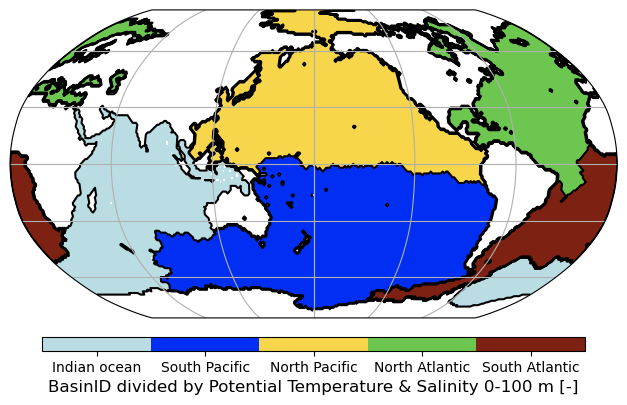

In [135]:
################################################
### Combine Salinity & Temperature divisions ###
################################################

# Copy basinsPotTemp.BasinIDA to make a new combine BasinIDACombined.
import copy as cp
#BasinIDACombined = cp.deepcopy(basinsPotTemp.BasinIDA)
#BasinIDACombined[BasinIDACombined==0] = np.nan;
#basinsCombined = cp.deepcopy(basinsPotTemp)
#basinsPotTemp
# Initial basin definition class
body = ["Earth", "Mars", "Venus", "Moon"]
body = body[0]
basinsCombined = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                         filename="{}_resampled_1deg.nc".format(body),
                         body=body);

basinsCombined.areaWeighti = cp.deepcopy(basinsPotTemp.areaWeighti)
basinsCombined.BasinIDA = cp.deepcopy(basinsPotTemp.BasinIDA)
basinsCombined.lat = cp.deepcopy(basinsPotTemp.lat)
basinsCombined.lon = cp.deepcopy(basinsPotTemp.lon)


# Set the initial basin ID to seach.
# Note that ID 1 -> continental/data missing regions.
basinCnt = 0;

# Iterate through each communitiy in basinsPotTemp.
for ID1 in np.unique(basinsPotTemp.BasinIDA):
    # Iterate through each communitiy in basinsPSU.
    for ID2 in np.unique(basinsPSU.BasinIDA):
        # Set basinIDs when overlapping occurs.
        basinsCombined.BasinIDA[(basinsPotTemp.BasinIDA==ID1)&(basinsPSU.BasinIDA==ID2)] = basinCnt;

        # Iterate basin counter if a basin ID was used.
        if len(basinsCombined.BasinIDA[(basinsPotTemp.BasinIDA==ID1)&(basinsPSU.BasinIDA==ID2)])>0: 
            basinCnt+=1;
            
# Set continental values to np.nan.
basinsCombined.BasinIDA[basinsCombined.BasinIDA==0] = np.nan;

def highlightBasins(basincnti = 5, shift=0):
    cmap = plt.cm.jet
    sampled_colors = cmap(np.linspace(0, 1, basincnti))
    sampled_colors = mpl.colormaps['jet'].resampled(6)
    EC.utils.plotGlobal(basinsCombined.lat, basinsCombined.lon, basinsCombined.BasinIDA,
                        outputDir = os.getcwd()+"/"+fldName,
                        fidName = "plotGlobal_{0}_{1}m_BasinIDACombined.png".format(depthRange[0], depthRange[1]),
                        cmapOpts={"cmap":sampled_colors,
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[shift,shift+basincnti]},
                        pltOpts={"valueType": "BasinID divided by Potential Temperature & Salinity {0}-{1} m".format(depthRange[0], depthRange[1]),
                                 "valueUnits": "-",
                                 "plotTitle":"",
                                 "plotZeroContour":False,
                                 "plotIntegerContours":False,
                                 "transparent":True},
                        savePNG=False,
                        saveSVG=False)

'''
for i in range(len(np.unique(basinsCombined.BasinIDA))):
    highlightBasins(basincnti = 2, shift=i)
    print(i)

for i in [44, 45, 46, 64, 79, 80, 91, 92, 95]:
    highlightBasins(basincnti = 2, shift=i-1)
    print(i)
'''
    
    

# Combine basins to recover something similar to froyland et al. 2014
NA = np.array([0, 1, 2, 3, 19, 20, 33, 34, 35, 36, 37, 38, 93, 94])
SA = np.array([44, 45, 46, 79, 80, 91, 92, 95])
# Note that 78 might be included in SP
I = np.array([4, 10, 40, 41, 42, 43, 47, 48, 49, 50, 51, 52, 53,
              54, 55, 56, 57, 58, 59, 60, 61, 70, 75, 76, 78, 89, 90])
# Note that 32 might be included in PS
NP = np.array([5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18,
               21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
               71, 74, 77, 101])
# Note that 83 might be included in SA
# Note that 64 might be included in SA
SP = np.array([39, 62, 63, 64, 65, 66, 67, 68, 69, 72, 73, 81, 82,
               83, 84, 85, 86, 87, 88, 96, 97, 98, 99, 100, 102])

BasinIDA = cp.deepcopy(basinsCombined.BasinIDA);
cnt=-.5;
for basin in [I, SP, NP, NA, SA]:
    cnt+=1
    for communityi in basin:
        BasinIDA[basinsCombined.BasinIDA==communityi] = cnt


basinsCombined.BasinIDA = BasinIDA


# Modified plotGlobal function
def plotGlobal(lat, lon, values,
               outputDir = os.getcwd(),
               fidName = "plotGlobal.png",
               cmapOpts={"cmap":"viridis",
                         "cbar-title":"cbar-title",
                         "cbar-range":[0,1]},
               pltOpts={"valueType": "Bathymetry",
                        "valueUnits": "m",
                        "plotTitle":"",
                        "plotZeroContour":False,
                        "plotIntegerContours":False,
                        "transparent":False},
               saveSVG=False,
               savePNG=False):
    """
    plotGlobal function is used to plot global ranging datasets that
    are represented with evenly spaced latitude and longitude values.

    Parameters
    ----------
    lat : NUMPY ARRAY
        nx2n array representing cell registered latitudes, in deg,
        ranging from [-90, 90]. Latitudes change from row to row.
    lon : NUMPY ARRAY
        nx2n array representing cell registered longitudes, in deg,
        ranging from [-180, 180]. Longitudes change from column to column.
    Values : NUMPY ARRAY
        nx2n array representing cell registered geographic data, in [-] units.
    cmapOpts : DICTIONARY
        A set of options to format the color map and bar for the plot
    pltOpts : DICTIONARY
        A set of options to format the plot
    saveSVG : BOOLEAN
        An option to save an SVG output. The default is False.
    savePNG : BOOLEAN
        An option to save an PNG output. The default is False.

    Returns
    -------
    None.
    """
    # Imports
    import cartopy.crs as ccrs # type: ignore
    
    # Start making figure
    ## Create a figure
    fig = plt.figure(figsize=(10, 5))

    ## Set up the Mollweide projection
    ax = plt.axes(projection=ccrs.Robinson(central_longitude=-180))

    ## Add the plot using pcolormesh
    mesh = ax.pcolormesh(lon, lat, values, transform=ccrs.PlateCarree(), cmap=cmapOpts["cmap"],
                         vmin=cmapOpts['cbar-range'][0], vmax=cmapOpts['cbar-range'][1])

    ## Add zero contour value
    try:
        if pltOpts["plotZeroContour"]:
            # Set any np.nan values to 0.ccrs
            values[np.isnan(values)] = 0;
            zeroContour = ax.contour(lon, lat, values, levels=[0], colors='black', transform=ccrs.PlateCarree())
    except:
        # Case where pltOpts["plotZeroContour"] was not defined
        pass

    ## Add contours in integer steps (usful for dividing catagorical data)
    try:
        if pltOpts["plotIntegerContours"]:
            # Set any np.nan values to 0.
            values[np.isnan(values)] = 0;
            zeroContour = ax.contour(lon, lat, values, levels=np.arange(len(np.unique(values))), colors='black', transform=ccrs.PlateCarree())
    except:
        # Case where pltOpts["plotIntegerContours"] was not defined
        pass

    ## Add a colorbar
    cbar = plt.colorbar(mesh, ax=ax, orientation='horizontal', pad=0.05, aspect=40, shrink=0.7)
    cbar.set_label(label="{} [{}]".format(pltOpts['valueType'], pltOpts['valueUnits']), size=12);
    cbar.ax.tick_params(labelsize=10)  # Adjust the size of colorbar ticks
    # Set the tick locations
    cbar.set_ticks(pltOpts["cbarTextValues"])
    # Set the tick labels
    cbar.set_ticklabels(pltOpts["cbarTextStrings"])

    ## Add gridlines
    ax.gridlines()

    ## Set a title
    plt.title(pltOpts['plotTitle'])

    ## Set transparency value
    try:
        pltOpts["transparent"];
    except:
        pltOpts["transparent"] = False;

    # Save figure
    if savePNG:
        plt.savefig("{}/{}".format(outputDir,fidName), dpi=600, transparent=pltOpts["transparent"])
    if saveSVG:
        plt.savefig("{}/{}".format(outputDir,fidName.replace(".png", ".svg")))


# Plot combine basin ID array
from matplotlib.colors import LinearSegmentedColormap
cbarTextValues  = [0.5, 1.5, 2.5, 3.5, 4.5];
cbarTextStrings = ["Indian ocean", "South Pacific",  "North Pacific",
                                   "North Atlantic", "South Atlantic"];
f = 256
cbarColors      = [(187/f,222/f,229/f), (0/f,47/f,244/f), (248/f, 215/f, 75/f),
                                      (108/f,199/f,79/f), (125/f,34/f,18/f)]
cm = LinearSegmentedColormap.from_list(
        'basins_Froylandetal2014', cbarColors, N=5)


plotGlobal(basinsCombined.lat, basinsCombined.lon, basinsCombined.BasinIDA,
                    outputDir = os.getcwd()+"/"+fldName,
                    fidName = "plotGlobal_{0}_{1}m_BasinIDACombinedMerged.png".format(depthRange[0], depthRange[1]),
                    cmapOpts={"cmap":cm,
                              "cbar-title":"cbar-title",
                              "cbar-range":[0,cnt+.5]},
                    pltOpts={"valueType": "BasinID divided by Potential Temperature & Salinity {0}-{1} m".format(depthRange[0], depthRange[1]),
                             "valueUnits": "-",
                             "plotTitle":"",
                             "plotZeroContour":False,
                             "plotIntegerContours":True,
                             "transparent":True,
                             "cbarTextValues":cbarTextValues,
                             "cbarTextStrings":cbarTextStrings},
                    savePNG=True,
                    saveSVG=False)




# Use Average deep ocean salinity to calculate basin communities at low resolution

Run calculations with node spacing representing equal area quadrangles for:
1. Louvain algorithm (low resolution)
2. Girvan Newman algorithm (low resolution)

/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:6470: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))


Duplicates removed: 154
Grid saved to: EA_Nodes_10.0_xyz.txt
parameter z


sh: 1: temp.txt: not found
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 429/429 [00:00<00:00, 19299.36it/s]


Duplicates removed: 58
Grid saved to: EA_Nodes_100.0_xyz.txt
parameter z


sh: 1: temp.txt: not found
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 22752.23it/s]


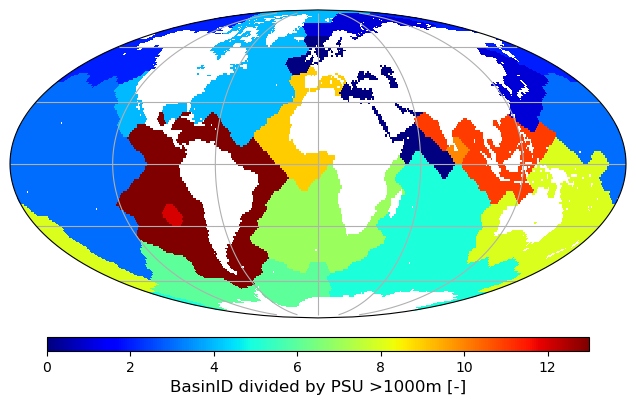

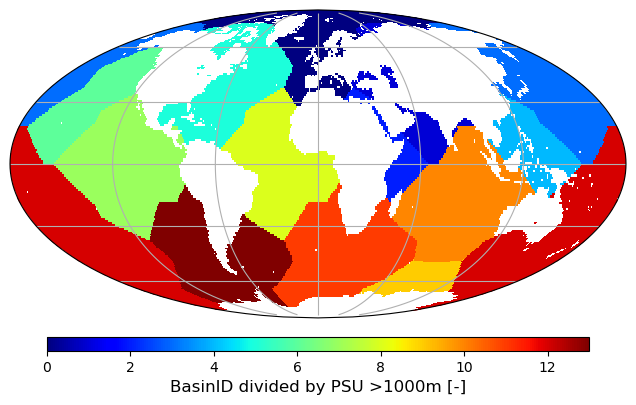

In [13]:
# Initial basin definition class
body = ["Earth", "Mars", "Venus", "Moon"]
body = body[0]
basins = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                         filename="{}_resampled_1deg.nc".format(body),
                         body=body);

# Define the equal area node options s.t. salinity is used for edge connections 
basins.EAinputs['dataGrid'] = os.getcwd()+"/GLORYS12V1/so_average_1000_5000m.nc"
basins.EAinputs['parameter'] = "z"

# Define basins based on user input boundaries
basins.defineBasins(minBasinCnt = 3,
                    method = "Louvain",
                    reducedRes={"on":True,"factor":10},
                    read=False,
                    write=True,
                    verbose=False)


basins.interp2regularGrid(mask=True)

EC.utils.plotGlobal(basins.lat, basins.lon, basins.BasinIDA,
                    outputDir = os.getcwd(),
                    fidName = "plotGlobal.png",
                    cmapOpts={"cmap":"jet",
                              "cbar-title":"cbar-title",
                              "cbar-range":[0,np.nanmax(basins.BasinIDA)]},
                    pltOpts={"valueType": "BasinID divided by PSU >1000m",
                             "valueUnits": "-",
                             "plotTitle":"",
                             "plotZeroContour":False,
                             "transparent":True},
                    savePNG=False,
                    saveSVG=False)


# Define basins based on user input boundaries
basins.defineBasins(minBasinCnt = 14,
                    method = "Girvan-Newman",
                    reducedRes={"on":True,"factor":10},
                    read=False,
                    write=True,
                    verbose=False)


basins.interp2regularGrid(mask=True)

EC.utils.plotGlobal(basins.lat, basins.lon, basins.BasinIDA,
                    outputDir = os.getcwd(),
                    fidName = "plotGlobal.png",
                    cmapOpts={"cmap":"jet",
                              "cbar-title":"cbar-title",
                              "cbar-range":[0,np.nanmax(basins.BasinIDA)]},
                    pltOpts={"valueType": "BasinID divided by PSU >1000m",
                             "valueUnits": "-",
                             "plotTitle":"",
                             "plotZeroContour":False,
                             "transparent":True},
                    savePNG=False,
                    saveSVG=False)
